In [1]:
# import the dependencies 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [6]:
import requests 
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a77414ceb13dc7b7f8781106de8688af


In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a77414ceb13dc7b7f8781106de8688af&q=Boston


In [9]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [12]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04d"}],"base":"stations","main":{"temp":34.7,"feels_like":24.26,"temp_min":33.01,"temp_max":37,"pressure":1019,"humidity":64},"visibility":10000,"wind":{"speed":10.36,"deg":270},"clouds":{"all":75},"dt":1610464588,"sys":{"type":1,"id":3486,"country":"US","sunrise":1610453510,"sunset":1610487184},"timezone":-18000,"id":4930956,"name":"Boston","cod":200}'

In [13]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 34.7,
  'feels_like': 24.26,
  'temp_min': 33.01,
  'temp_max': 37,
  'pressure': 1019,
  'humidity': 64},
 'visibility': 10000,
 'wind': {'speed': 10.36, 'deg': 270},
 'clouds': {'all': 75},
 'dt': 1610464588,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1610453510,
  'sunset': 1610487184},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [16]:
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a77414ceb13dc7b7f8781106de8688af&q=Boston


In [17]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 34.7,
  'feels_like': 24.26,
  'temp_min': 33.01,
  'temp_max': 37,
  'pressure': 1019,
  'humidity': 64},
 'visibility': 10000,
 'wind': {'speed': 10.36, 'deg': 270},
 'clouds': {'all': 75},
 'dt': 1610464588,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1610453510,
  'sunset': 1610487184},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [18]:
# Get the JSON data.
boston_data = city_weather.json()

In [19]:
boston_data["sys"]

{'type': 1,
 'id': 3486,
 'country': 'US',
 'sunrise': 1610453510,
 'sunset': 1610487184}

In [20]:
boston_data["sys"]["country"]

'US'

In [21]:
boston_data["dt"]

1610464588

In [22]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 37 64 75 10.36


In [23]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-01-12 15:16:28'

In [24]:

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [25]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Processing Record 1 of Set 1 | severo-kurilsk
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | olafsvik
Processing Record 4 of Set 1 | mahebourg
Processing Record 5 of Set 1 | upernavik
Processing Record 6 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | dolbeau
City not found. Skipping...
Processing Record 9 of Set 1 | ballina
Processing Record 10 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 11 of Set 1 | formosa do rio preto
Processing Record 12 of Set 1 | spornoye
Processing Record 13 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | mackay
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | lata
Processing Record 19 of Set 1 | mormugao
Processing Record 20 of Set 1 | chapais
Processing Record 21 of Set 1 | tutoia
Processing Rec

Processing Record 34 of Set 4 | linhares
Processing Record 35 of Set 4 | tasiilaq
Processing Record 36 of Set 4 | praia da vitoria
Processing Record 37 of Set 4 | severodvinsk
Processing Record 38 of Set 4 | asau
Processing Record 39 of Set 4 | carnarvon
Processing Record 40 of Set 4 | port-cartier
Processing Record 41 of Set 4 | alofi
Processing Record 42 of Set 4 | terra santa
Processing Record 43 of Set 4 | sarangani
Processing Record 44 of Set 4 | takoradi
Processing Record 45 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 46 of Set 4 | eureka
Processing Record 47 of Set 4 | khashtarak
Processing Record 48 of Set 4 | pangnirtung
Processing Record 49 of Set 4 | karaul
City not found. Skipping...
Processing Record 50 of Set 4 | tolaga bay
Processing Record 1 of Set 5 | strezhevoy
Processing Record 2 of Set 5 | aksum
Processing Record 3 of Set 5 | crestview
Processing Record 4 of Set 5 | tibacuy
Processing Record 5 of Set 5 | fortuna
Processing Record 6 of Set 5 |

Processing Record 25 of Set 8 | souillac
Processing Record 26 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 27 of Set 8 | antofagasta
Processing Record 28 of Set 8 | katsuura
Processing Record 29 of Set 8 | chaa-khol
City not found. Skipping...
Processing Record 30 of Set 8 | portoferraio
Processing Record 31 of Set 8 | vilyuysk
Processing Record 32 of Set 8 | raymond
Processing Record 33 of Set 8 | tual
Processing Record 34 of Set 8 | kindu
Processing Record 35 of Set 8 | yertarskiy
Processing Record 36 of Set 8 | mezen
Processing Record 37 of Set 8 | buala
Processing Record 38 of Set 8 | bathsheba
Processing Record 39 of Set 8 | pasighat
Processing Record 40 of Set 8 | shenzhen
Processing Record 41 of Set 8 | buraydah
Processing Record 42 of Set 8 | thanh hoa
Processing Record 43 of Set 8 | capitao poco
Processing Record 44 of Set 8 | faya
Processing Record 45 of Set 8 | yinchuan
Processing Record 46 of Set 8 | yucca valley
Processing Record 47 of Set 8 | radomsko

Processing Record 11 of Set 12 | berlevag
Processing Record 12 of Set 12 | ellsworth
Processing Record 13 of Set 12 | nouadhibou
Processing Record 14 of Set 12 | dolinsk
Processing Record 15 of Set 12 | praia
Processing Record 16 of Set 12 | kieta
Processing Record 17 of Set 12 | kandrian
Processing Record 18 of Set 12 | sambava
Processing Record 19 of Set 12 | palmer
Processing Record 20 of Set 12 | shimoda
Processing Record 21 of Set 12 | enshi
Processing Record 22 of Set 12 | udimskiy
Processing Record 23 of Set 12 | mahibadhoo
Processing Record 24 of Set 12 | sovetskiy
Processing Record 25 of Set 12 | linqing
Processing Record 26 of Set 12 | dekar
Processing Record 27 of Set 12 | beyneu
Processing Record 28 of Set 12 | lasa
Processing Record 29 of Set 12 | lima
Processing Record 30 of Set 12 | kamenka
Processing Record 31 of Set 12 | camana
Processing Record 32 of Set 12 | morondava
Processing Record 33 of Set 12 | medvedka
Processing Record 34 of Set 12 | peniche
Processing Record

In [26]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Severo-Kurilsk,50.6789,156.1250,17.83,90,96,15.75,RU,2021-01-12 15:17:59
1,Ushuaia,-54.8000,-68.3000,46.40,46,75,14.97,AR,2021-01-12 15:17:59
2,Olafsvik,64.8945,-23.7142,35.10,82,83,15.37,IS,2021-01-12 15:17:59
3,Mahebourg,-20.4081,57.7000,80.60,89,40,17.27,MU,2021-01-12 15:16:16
4,Upernavik,72.7868,-56.1549,19.53,96,100,3.29,GL,2021-01-12 15:17:59
5,Barrow,71.2906,-156.7887,1.40,78,90,23.02,US,2021-01-12 15:15:01
6,Ballina,-28.8667,153.5667,66.20,88,40,3.44,AU,2021-01-12 15:18:00
7,Formosa Do Rio Preto,-11.0483,-45.1931,97.84,39,7,0.81,BR,2021-01-12 15:18:00
8,Spornoye,50.8448,37.2913,26.60,80,75,4.47,RU,2021-01-12 15:18:00
9,Rikitea,-23.1203,-134.9692,77.59,78,8,18.66,PF,2021-01-12 15:18:01


In [27]:
#reorder columns 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Severo-Kurilsk,RU,2021-01-12 15:17:59,50.6789,156.1250,17.83,90,96,15.75
1,Ushuaia,AR,2021-01-12 15:17:59,-54.8000,-68.3000,46.40,46,75,14.97
2,Olafsvik,IS,2021-01-12 15:17:59,64.8945,-23.7142,35.10,82,83,15.37
3,Mahebourg,MU,2021-01-12 15:16:16,-20.4081,57.7000,80.60,89,40,17.27
4,Upernavik,GL,2021-01-12 15:17:59,72.7868,-56.1549,19.53,96,100,3.29
...,...,...,...,...,...,...,...,...,...
553,Vadso,NO,2021-01-12 15:19:36,70.0744,29.7487,10.40,61,0,16.11
554,Stornoway,GB,2021-01-12 15:19:36,58.2093,-6.3865,39.99,81,40,3.44
555,Pehowa,IN,2021-01-12 15:19:36,29.9833,76.5833,50.61,49,0,5.53
556,Nazareno,MX,2021-01-12 15:19:36,25.3833,-103.4167,33.80,80,1,3.00


In [36]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [37]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [38]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1610464998.9487295

In [39]:
today = time.strftime("%x")
today

'01/12/21'

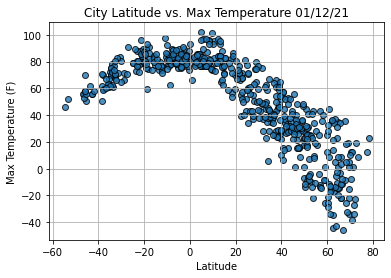

In [40]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

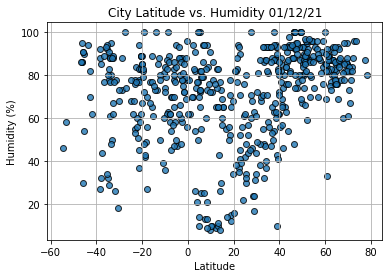

In [41]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

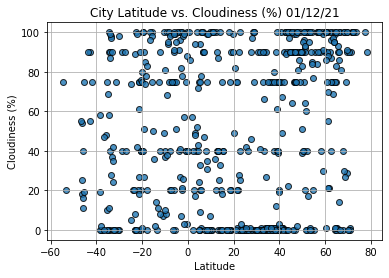

In [42]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

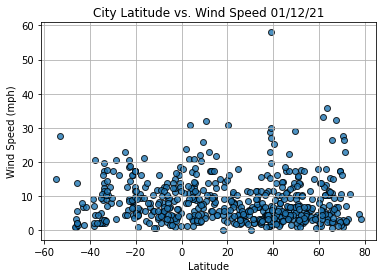

In [43]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [44]:
from scipy.stats import linregress

In [45]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
# def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

# Import linregress
#     from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [46]:
index13 = city_data_df.loc[13]
index13 


City                         Lata
Country                        PT
Date          2021-01-12 15:18:01
Lat                       40.1629
Lng                       -8.3327
Max Temp                    55.99
Humidity                       56
Cloudiness                      0
Wind Speed                      3
Name: 13, dtype: object

In [47]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4       True
       ...  
553     True
554     True
555     True
556     True
557     True
Name: Lat, Length: 558, dtype: bool

In [48]:
#return a dataframe with all data fitting the criteria for lats greate than or equal to zero 
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Severo-Kurilsk,RU,2021-01-12 15:17:59,50.6789,156.1250,17.83,90,96,15.75
2,Olafsvik,IS,2021-01-12 15:17:59,64.8945,-23.7142,35.10,82,83,15.37
4,Upernavik,GL,2021-01-12 15:17:59,72.7868,-56.1549,19.53,96,100,3.29
5,Barrow,US,2021-01-12 15:15:01,71.2906,-156.7887,1.40,78,90,23.02
8,Spornoye,RU,2021-01-12 15:18:00,50.8448,37.2913,26.60,80,75,4.47
...,...,...,...,...,...,...,...,...,...
553,Vadso,NO,2021-01-12 15:19:36,70.0744,29.7487,10.40,61,0,16.11
554,Stornoway,GB,2021-01-12 15:19:36,58.2093,-6.3865,39.99,81,40,3.44
555,Pehowa,IN,2021-01-12 15:19:36,29.9833,76.5833,50.61,49,0,5.53
556,Nazareno,MX,2021-01-12 15:19:36,25.3833,-103.4167,33.80,80,1,3.00


In [49]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

In [50]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

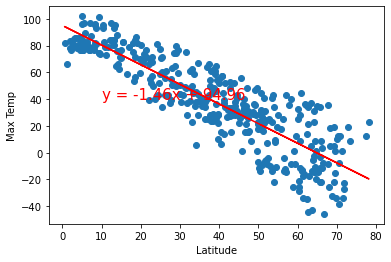

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

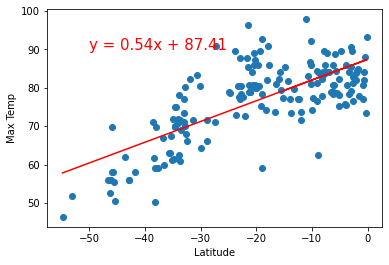

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

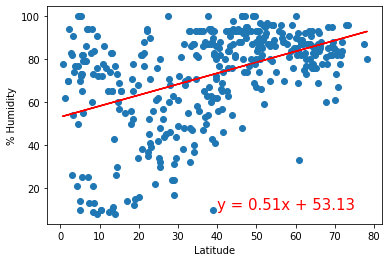

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

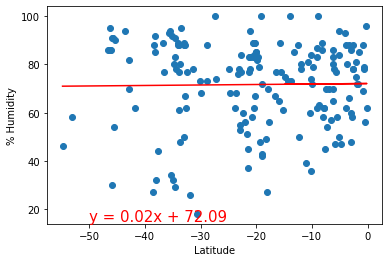

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

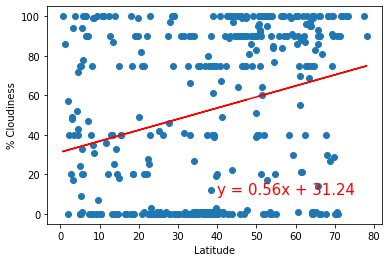

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

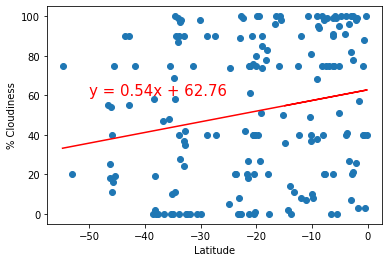

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

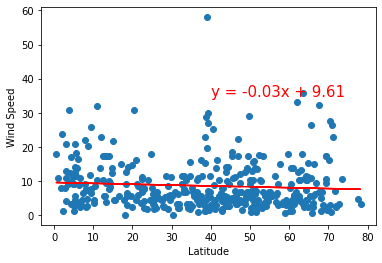

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

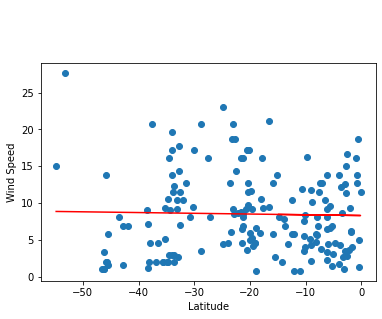

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [59]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

In [60]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Severo-Kurilsk,RU,2021-01-12 15:17:59,50.6789,156.1250,17.83,90,96,15.75
1,1,Ushuaia,AR,2021-01-12 15:17:59,-54.8000,-68.3000,46.40,46,75,14.97
2,2,Olafsvik,IS,2021-01-12 15:17:59,64.8945,-23.7142,35.10,82,83,15.37
3,3,Mahebourg,MU,2021-01-12 15:16:16,-20.4081,57.7000,80.60,89,40,17.27
4,4,Upernavik,GL,2021-01-12 15:17:59,72.7868,-56.1549,19.53,96,100,3.29


In [61]:
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [62]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [63]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

In [64]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# add a zoom level
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Assign the heatmap variable.
#heat_layer = gmaps.heatmap_layer(locations, weights=temps)
#heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp])
heat_layer = gmaps.heatmap_layer(locations, weights=temps, dissipating=False, max_intensity=300, point_radius=4)
# Add the heatmap layer.
fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [65]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [66]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [67]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [68]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,3,Mahebourg,MU,2021-01-12 15:16:16,-20.4081,57.7000,80.60,89,40,17.27
9,9,Rikitea,PF,2021-01-12 15:18:01,-23.1203,-134.9692,77.59,78,8,18.66
10,10,Mackay,AU,2021-01-12 15:18:01,-21.1500,149.2000,78.80,83,75,16.11
14,14,Mormugao,IN,2021-01-12 15:18:02,15.4000,73.8000,82.40,65,40,4.61
16,16,Tutoia,BR,2021-01-12 15:18:02,-2.7619,-42.2744,89.60,58,20,14.97
21,21,Avarua,CK,2021-01-12 15:18:03,-21.2078,-159.7750,78.80,78,61,8.05
22,22,Vao,NC,2021-01-12 15:18:03,-22.6667,167.4833,78.33,84,100,18.75
28,28,Pitimbu,BR,2021-01-12 15:18:04,-7.4706,-34.8086,84.20,70,75,12.66
29,29,Palmas,BR,2021-01-12 15:17:50,-10.2128,-48.3603,86.00,74,40,3.44
30,30,Cape Town,ZA,2021-01-12 15:18:05,-33.9258,18.4232,78.01,61,0,17.27


In [69]:
preferred_cities_df.count()

City_ID       173
City          173
Country       170
Date          173
Lat           173
Lng           173
Max Temp      173
Humidity      173
Cloudiness    173
Wind Speed    173
dtype: int64

In [70]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
3,Mahebourg,MU,80.60,-20.4081,57.7000,
9,Rikitea,PF,77.59,-23.1203,-134.9692,
10,Mackay,AU,78.80,-21.1500,149.2000,
14,Mormugao,IN,82.40,15.4000,73.8000,
16,Tutoia,BR,89.60,-2.7619,-42.2744,
21,Avarua,CK,78.80,-21.2078,-159.7750,
22,Vao,NC,78.33,-22.6667,167.4833,
28,Pitimbu,BR,84.20,-7.4706,-34.8086,
29,Palmas,BR,86.00,-10.2128,-48.3603,
30,Cape Town,ZA,78.01,-33.9258,18.4232,


In [71]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10) 

,City,Country,Max Temp,Lat,Lng,Hotel Name
3,Mahebourg,MU,80.60,-20.4081,57.7000,
9,Rikitea,PF,77.59,-23.1203,-134.9692,
10,Mackay,AU,78.80,-21.1500,149.2000,
14,Mormugao,IN,82.40,15.4000,73.8000,
16,Tutoia,BR,89.60,-2.7619,-42.2744,
21,Avarua,CK,78.80,-21.2078,-159.7750,
22,Vao,NC,78.33,-22.6667,167.4833,
28,Pitimbu,BR,84.20,-7.4706,-34.8086,
29,Palmas,BR,86.00,-10.2128,-48.3603,
30,Cape Town,ZA,78.01,-33.9258,18.4232,


In [72]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

In [73]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    # Grab the first hotel from the results and store the name.
    hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except:
        print("Hotel not found... skipping.")
                                                             
        

IndexError: list index out of range

In [ ]:
# Add a heatmap of temperature for the vacation spots.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False,
             max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

In [ ]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

In [ ]:
info_box_template = """
<dl>
<dt>Name</dt><dd>{column1}</dd>
<dt>Another name</dt><dd>{column2}</dd>
</dl>
"""

In [ ]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

In [ ]:
# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [ ]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig